## BUILD THE NEURAL NETWORK

* Neural networks comprise of layers/modules that perform operations on data.
* The torch.nn namespace provides all the building blocks you need to build your own neural network.
* Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers).

In [1]:
# Importing the required libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Define the Class

* We can define our neural network by subclassing " *nn.nodule* " , and initialize the neural network layers in *_ _ init _ _*.

* Every *nn.Module* subclass implements the operations on input data in the forward method

In [6]:
# Building the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
#Printing the model
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


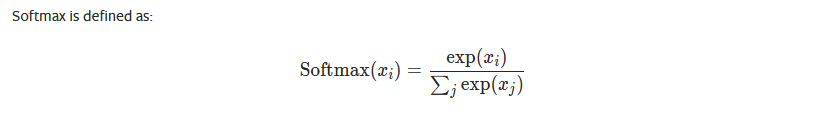

* Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [16]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


### Model Layers

In [25]:
"""Let's take a sample minibatch of 3 images of size 28x28 and see \
what happens to it as we pass it through the network."""
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

* The nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values

In [18]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

* The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [19]:
layer1 = nn.Linear(in_features= 28*28, out_features= 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

* Non-linear activations are what create the complex mappings between the model’s inputs and outputs.
* They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.


In [26]:
"""In this model, we use nn.ReLU between our linear layers, 
but there’s other activations to introduce non-linearity in your model."""
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[0.0000, 0.0764, 0.0000, 0.0216, 0.0000, 0.0000, 0.2955, 0.0000, 0.0000,
         0.0000, 0.0347, 0.1142, 0.9000, 0.1665, 0.4208, 0.0000, 0.0000, 0.0000,
         0.2259, 0.0000],
        [0.0000, 0.3291, 0.0000, 0.1994, 0.0000, 0.0000, 0.5223, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0380, 1.0507, 0.0000, 0.5918, 0.0000, 0.0000, 0.1582,
         0.0000, 0.0000],
        [0.0000, 0.2757, 0.0000, 0.0881, 0.0000, 0.0000, 0.2017, 0.0000, 0.2426,
         0.1458, 0.0000, 0.0000, 0.6195, 0.1184, 0.6142, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[0.0000, 0.0764, 0.0000, 0.0216, 0.0000, 0.0000, 0.2955, 0.0000, 0.0000,
         0.0000, 0.0347, 0.1142, 0.9000, 0.1665, 0.4208, 0.0000, 0.0000, 0.0000,
         0.2259, 0.0000],
        [0.0000, 0.3291, 0.0000, 0.1994, 0.0000, 0.0000, 0.5223, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0380, 1.0507, 0.0000, 0.5918, 0.0000, 0.0000, 0.1582,
         0.0000, 0.0000],
       

### nn.Sequential

* nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [21]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(20, 10))
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

### nn.Softmax

* The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module.
* The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. 
* dim parameter indicates the dimension along which the values must sum to 1.

In [23]:
softmax = nn.Softmax(dim= 1)
pred_probab = softmax(logits)

### Model Parameters

* Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In [24]:
print(f"Model Parameters: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model Parameters: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0275,  0.0012, -0.0021,  ...,  0.0006, -0.0114, -0.0076],
        [ 0.0230, -0.0134, -0.0311,  ...,  0.0189, -0.0330, -0.0188]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([ 0.0141, -0.0096], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0365, -0.0426, -0.0323,  ..., -0.0174,  0.0030,  0.0379],
        [-0.0076,  0.0141, -0.0114,  ..., -0.0063,  0.0183, -0.0058]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si